# POKER HAND STRENGTH PREDICTOR USING SVM

In [28]:

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix
import seaborn as sns

def print_confusion_matrix(confusion_matrix,class_names,figsize=(5,3),fontsize=10):
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names, )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    return fig

In [29]:
#Loading the dataset
from __future__ import print_function
import os
import pandas as pd

#Training data
dataPath = ['/home/ansh/Desktop/MachineLearning/Data']
filePath = os.sep.join(dataPath + ['poker-hand-training-true.csv'])
df = pd.read_csv(filePath, header = 0)

#Testing data 
filePath = os.sep.join(dataPath + ['poker-hand-testing.csv'])
df1 = pd.read_csv(filePath, header = 0)

#Defining the dataframe columns
df.columns = ['S1', 'C1', 'S2', 'C2', 'S3','C3','S4','C4','S5','C5','CLASS']
df1.columns = ['S1', 'C1', 'S2', 'C2', 'S3','C3','S4','C4','S5','C5','CLASS']

In [30]:
df.head(5)

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS
0,2,11,2,13,2,10,2,12,2,1,9
1,3,12,3,11,3,13,3,10,3,1,9
2,4,10,4,11,4,1,4,13,4,12,9
3,4,1,4,13,4,12,4,11,4,10,9
4,1,2,1,4,1,5,1,3,1,6,8


In [31]:
df1.head(5)

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS
0,3,12,3,2,3,11,4,5,2,5,1
1,1,9,4,6,1,4,3,2,3,9,1
2,1,4,3,13,2,13,2,1,3,6,1
3,3,10,2,7,1,2,2,11,4,9,0
4,1,3,4,5,3,4,1,12,4,6,0


In [32]:

#Setting the train and test data
from sklearn.model_selection import train_test_split
X_train = df1.drop(['CLASS'], axis = 1)
y_train = df1.CLASS

X_test = df.drop(['CLASS'], axis = 1)
y_test = df.CLASS

print("Training dataset shape: ", X_train.shape, "\nTesting dataset shape: ", X_test.shape)

Training dataset shape:  (999999, 10) 
Testing dataset shape:  (25009, 10)


In [49]:
#SGDClassifier
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier()

#Calculating fitting time
startTime = time()
SGD.fit(X_train, y_train)
print("Training time for SGDClassifier: ", round(time()-startTime, 3), " seconds")

#Making predictions and calculating the prediction time 
startTime = time()
predictions = SGD.predict(X_test)
print("Prediction time for SGDClassifier: ", round(time()-startTime, 3), " seconds")

/home/ansh/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Training time for SGDClassifier:  8.941  seconds
Prediction time for SGDClassifier:  0.05  seconds


Cross-validation score: 


/home/ansh/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/ansh/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/ansh/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter w

[0.92369555 0.92370131 0.92370732]


/home/ansh/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/ansh/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/ansh/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to 

Confusion matrix: 
[[462345      0      0      0      0      0      0      0      0      0]
 [     0 389776      0      0      0      0      0      0      0      0]
 [     0  43914      0      0      0      0      0      0      0      0]
 [     0  19506      0      0      0      0      0      0      0      0]
 [     0   3570      0      0      0      0      0      0      0      0]
 [     0   1846      0      0      0      0      0      0      0      0]
 [     0   1311      0      0      0      0      0      0      0      0]
 [     0    215      0      0      0      0      0      0      0      0]
 [     0     17      0      0      0      0      0      0      0      0]
 [     0      7      0      0      0      0      0      0      0      0]]


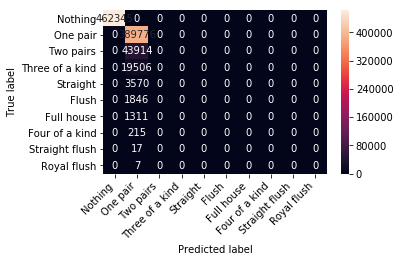

Precision score: 
0.9237013919677575
Recall score: 
0.9237013919677575
F1 score: 
0.9237013919677575


In [51]:
#Cross-validation score
print("Cross-validation score: ")
print(cross_val_score(SGD, X_train, y_train, scoring="accuracy"))

#Cross_validation predictions
predictions = cross_val_predict(SGD, X_train, y_train, cv=3)

#Confusion matrix
print("Confusion matrix: ")
print(confusion_matrix(y_train, predictions))

#A better figure representation of the confusion matrix
print_confusion_matrix(confusion_matrix(y_train, predictions), classNames)

#Precision
print("Precision score: ")
print(precision_score(y_train, predictions, average='micro'))

#Recall score
print("Recall score: ")
print(recall_score(y_train, predictions, average='micro')) 

#F1 score
print("F1 score: ")
print(f1_score(y_train, predictions, average='micro'))

In [106]:
from tensorflow.python.keras.layers import Dense,Dropout
from tensorflow.python.keras.models import Sequential

def createModel():
    model = Sequential()
    model.add(Dense(10, input_dim=11, kernel_initializer='normal', activation='relu'))
    print("The first layer.")
    
    #Hidden layer
    model.add(Dense(3, kernel_initializer='normal', activation='relu'))
    print("The hidden layer.")
    
    #Output layer
    model.add(Dense(10, kernel_initializer='normal', activation='softmax'))
    print("The output layer.")
    
    # Compiling model
    model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

from tensorflow.python.keras.wrappers.scikit_learn import KerasClassifier
print("Starting the estimator... 9")

#Creation and fitting time measurement
startTime = time()
kerasModel = createModel()
history = kerasModel.fit(X_train, y_train, epochs=5, batch_size=50, verbose=1)
print("Time for creation and fitting: ", round(time() - startTime, 3), " seconds")

Starting the estimator... 9
The first layer.
The hidden layer.
The output layer.
Epoch 1/5
922507/922507 [==============================] - 33s 36us/step - loss: 0.0921 - acc: 0.9595
Epoch 2/5
922507/922507 [==============================] - 30s 32us/step - loss: 0.0113 - acc: 0.9958
Epoch 3/5
922507/922507 [==============================] - 29s 31us/step - loss: 0.0068 - acc: 0.9976
Epoch 4/5
922507/922507 [==============================] - 28s 31us/step - loss: 0.0051 - acc: 0.9982
Epoch 5/5
922507/922507 [==============================] - 28s 31us/step - loss: 0.0045 - acc: 0.9985
Time for creation and fitting:  148.989  seconds
